In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
img = cv2.imread('/content/gdrive/My Drive/Colab IP/Images/cell-bright.bmp')

In [5]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
N=18

In [7]:
dimh=np.int32(gray_img.shape[0]/N)
dimw=np.int32(gray_img.shape[1]/N)

In [8]:
dh_rest=(gray_img.shape[0]%N)
dw_rest=(gray_img.shape[1]%N)

In [9]:
mean_img=np.zeros((N,N))
output_img = np.zeros((gray_img.shape[0],gray_img.shape[1]))

In [10]:
def mean_function(img,dimh,dimw,h,w):
  count=1
  sum=0
  ave=0
  for y in range(h,h+dimh):
    for x in range(w,w+dimw):
      sum=sum+img[y,x]
      count=count+1
  ave=np.int32(sum/count)
  return ave

In [11]:
for h in range(0,img.shape[0]-dh_rest,dimh):
  for w in range(0,img.shape[1]-dw_rest,dimw):
    if(h+dimh<img.shape[0] and w+dimw<img.shape[1]):
      mean_img[np.int32(h/dimh),np.int32(w/dimw)]=mean_function(gray_img,dimh,dimw,h,w)

In [12]:
for h in range(0,gray_img.shape[0]-dh_rest):
  for w in range(0,gray_img.shape[1]-dw_rest):
    if(gray_img[h,w]>mean_img[np.int32(h/dimh),np.int32(w/dimw)]):
      output_img[h,w]=255
    else:
      output_img[h,w]=0

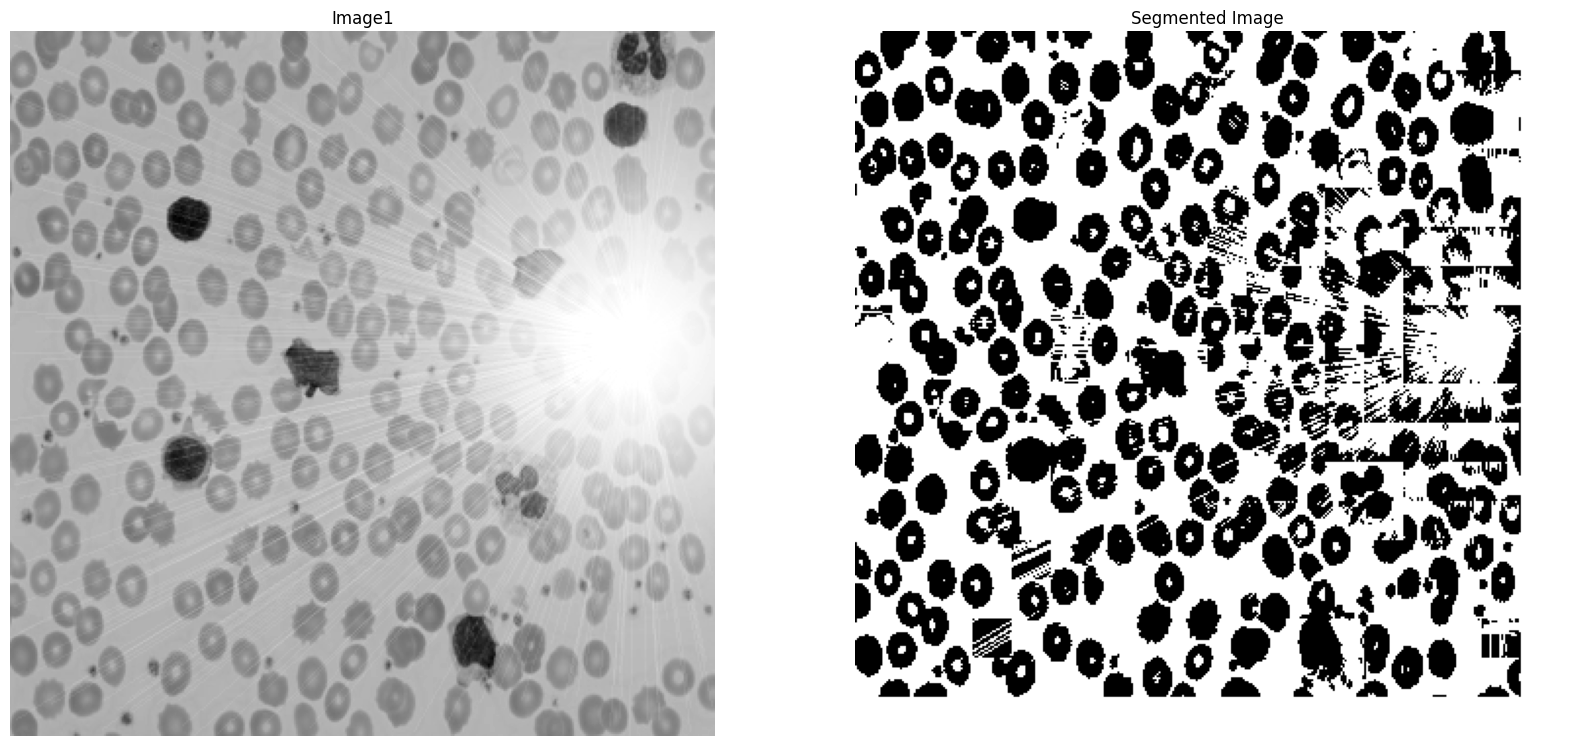

In [13]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title('Image1')
plt.imshow(gray_img,cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title('Segmented Image')
plt.imshow(output_img,cmap='gray')
plt.axis("off")
plt.show()

In [14]:
img= cv2.imread('/content/gdrive/My Drive/Colab IP/Images/areo2.bmp')

In [25]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output_img = np.zeros((gray_img.shape[0], gray_img.shape[1]))

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [26]:
def saturation (value):
  if(value>255):
    value=255;
  return value

In [20]:
Nmax=255
Nmin=0
max=0
min=255

In [28]:
for h in range(gray_img.shape[0]):
    for w in range(gray_img.shape[1]):
        if max_val < gray_img[h, w]:
            max_val = gray_img[h, w]
        if min_val > gray_img[h, w]:
            min_val = gray_img[h, w]

NameError: name 'max_val' is not defined

In [22]:
for h in range(img.shape[0]):
  for w in range(img.shape[1]):
    output_img[h,w] = saturation(np.int32(((gray_img[h,w]-min)*np.float32(Nmax-Nmin))/(max-min)+Nmin))

AttributeError: 'NoneType' object has no attribute 'shape'

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/histogram.cpp:1008: error: (-210:Unsupported format or combination of formats)  in function 'calcHist'


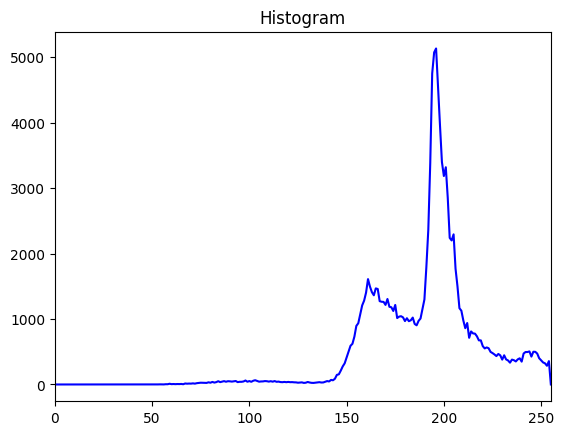

In [23]:
hist=cv2.calcHist([gray_img],[0],None,[256],[0,255])
plt.title('Histogram')
plt.plot(hist,color='b',label='original histo')
plt.xlim([0,255])
hist=cv2.calcHist([output_img],[0],None,[256],[0,255])
plt.plot(hist,color='g',label='streched histo')
plt.xlim([0,255])
plt.legend()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title('Image1')
plt.imshow(gray_img,cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title('Streched Image')
plt.imshow(output_img,cmap='gray')
plt.axis("off")
plt.show()